In [1]:
import pandas as pd
import pathlib

In [33]:
poc1_folder = pathlib.Path("../../data/POC1_data/")

all_cities_metrics = poc1_folder / "final_df.csv"
all_cities_df = pd.read_csv(all_cities_metrics)

In [34]:
all_cities_df.shape

(8909, 102)

In [35]:
all_cities_df.head()

,country,country_iso,core_city,uc_id,cc_avg_dir,cc_avg_undir,cc_wt_avg_dir,cc_wt_avg_undir,circuity,elev_iqr,...,21way_int_prop,22way_int_prop,23way_int_prop,24way_int_prop,25way_int_prop,26way_int_prop,27way_int_prop,28way_int_prop,pop_density,prop_used_area
0,indonesia,IDN,wates,12375,0.036690,0.038630,0.004276,0.004359,1.065403,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22689.351429,0.168496
1,brazil,BRA,taquaralto,1186,0.024520,0.035016,0.001195,0.001439,1.008276,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9363.163689,0.481018
2,china,CHN,xinqiao,12218,0.036481,0.045724,0.001608,0.001723,1.016544,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4747.217111,0.525190
3,colombia,COL,yopal,687,0.016110,0.019414,0.001072,0.001221,1.011106,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29654.434191,0.352858
4,czech_republic,CZE,pilsen,2886,0.032913,0.044298,0.001418,0.001758,1.047311,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5057.822603,0.530648


In [28]:
chosen_cities_path = poc1_folder / "chosen_cities.csv"
planned_df = pd.read_csv(chosen_cities_path)

In [29]:
planned_df.shape

(313, 56)

In [30]:
planned_df.head()

,country,country_iso,core_city,uc_id,cc_avg_dir,cc_avg_undir,cc_wt_avg_dir,cc_wt_avg_undir,circuity,elev_iqr,...,meshedness_coefficient,pop_density,prop_used_area,big,organic,3_way_cities,type_one_city,type_two_city,city_type,chosen
0,brazil,BRA,gurupi,1167,0.025382,0.031759,0.001664,0.001856,1.010663,19.0,...,0.979855,9288.154109,0.350082,False,True,False,True,False,1,True
1,ecuador,ECU,pasaje,435,0.019233,0.021797,0.001809,0.001994,1.019819,4.0,...,1.006275,23517.269167,0.261534,False,True,False,True,False,1,True
2,colombia,COL,el_carmen_de_bolivar,608,0.029501,0.029762,0.001410,0.001443,1.019432,26.0,...,1.087108,26846.920532,0.313369,False,True,False,True,False,1,True
3,kazakhstan,KAZ,zhanaozen,5649,0.026850,0.031626,0.002316,0.002450,1.023291,7.0,...,1.026153,10670.246699,0.381292,False,True,False,False,True,2,True
4,china,CHN,juxian,11648,0.043680,0.047587,0.003427,0.003780,1.009743,4.0,...,0.906621,4773.471552,0.598367,False,True,False,True,False,1,True


In [31]:
planned_df[['node_count', 'k_avg']].describe().T

,count,mean,std,min,25%,50%,75%,max
node_count,313.0,3290.869010,11335.079102,9.000000,545.000000,1509.000000,2866.000000,162623.000000
k_avg,313.0,3.223357,0.163385,2.222222,3.137931,3.241865,3.330544,3.646295


<Axes: ylabel='Frequency'>

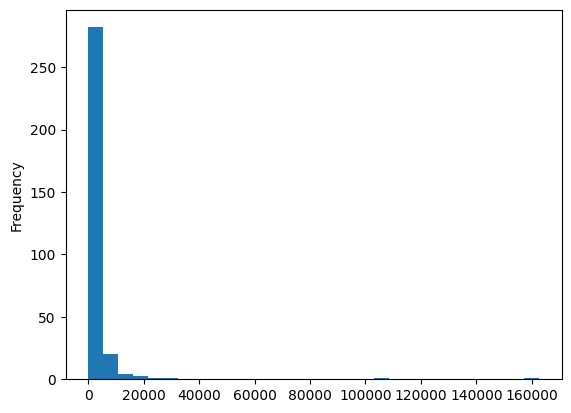

In [32]:
planned_df['node_count'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

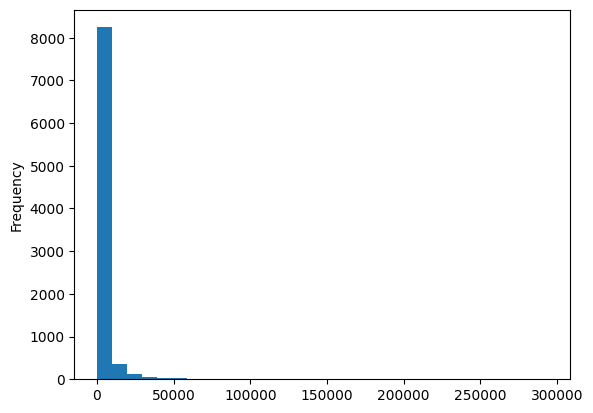

In [36]:
all_cities_df['node_count'].plot.hist(bins=30)

Como os grafos tem, em média, grau 3.23, é esperado que tenham 3.23 * num_nodes arestas para cada grafo. Como existem grafos com muitos nós, por exemplo, mais que 40 mil, isso acarretaria em um custo alto de memória para o node2vec e outros carregarem. Assim, vou considerar para análise apenas grafos com menos de 30 mil nós.

In [37]:
planned_df = planned_df.query('node_count < 30000')
all_cities_df = all_cities_df.query('node_count < 30000')

In [38]:
planned_df.shape, all_cities_df.shape

((311, 56), (8736, 102))

In [39]:
planned_cities_ids = planned_df['uc_id'].tolist()

In [40]:
len(planned_cities_ids)

311

In [41]:
all_cities_ids = all_cities_df['uc_id'].tolist()

In [42]:
len(all_cities_ids)

8736

In [43]:
not_planned_cities_ids = list(set(all_cities_ids) - set(planned_cities_ids))

In [44]:
len(not_planned_cities_ids)

8425

In [45]:
import random

In [46]:
random.seed(42)

random_planned_cities = random.sample(planned_cities_ids, k=150)
random_not_planned_cities = random.sample(not_planned_cities_ids, k=150)

In [47]:
len(set(random_planned_cities)), len(set(random_not_planned_cities))

(150, 150)

In [48]:
len(set(random_planned_cities) - set(random_not_planned_cities))

150

In [49]:
import pickle

In [24]:
def pickle_to_file(file_path, data):
    with open(file_path, 'wb') as my_file:
        pickle.dump(data, my_file)

target_folder = pathlib.Path("../../data/POC2_data")
target_folder.mkdir(parents=True, exist_ok=True)

target_planned_cities_file = target_folder / 'random_planned_cities_id.pkl'
target_not_planned_cities_file = target_folder / 'random_not_planned_cities_id.pkl'

pickle_to_file(target_planned_cities_file, random_planned_cities)
pickle_to_file(target_not_planned_cities_file, random_not_chosen_cities)

In [25]:
def unpickle_from_file(file_path):
    with open(file_path, 'rb') as my_file:
        data = pickle.load(my_file)
    return data

teste = unpickle_from_file(target_chosen_cities_file)
print(teste)
teste = unpickle_from_file(target_not_chosen_cities_file)
print(teste)

[1120, 668, 11957, 4193, 1639, 4311, 2882, 10778, 995, 1676, 12756, 1255, 10872, 1471, 3610, 201, 357, 1334, 5309, 1050, 3504, 330, 1565, 5526, 5649, 87, 503, 1010, 3742, 4508, 660, 5434, 1425, 1470, 10121, 1209, 473, 5765, 1084, 61, 3638, 5929, 1062, 3621, 11510, 521, 343, 3525, 3544, 2842, 384, 3319, 2768, 4509, 10958, 4415, 1199, 10711, 1086, 3732, 3233, 11946, 1109, 4069, 1231, 5820, 647, 2633, 10172, 63, 70, 10238, 1171, 3835, 10179, 1220, 1358, 3831, 1624, 1135, 1089, 1058, 496, 4204, 3819, 424, 12413, 4246, 1181, 444, 955, 11690, 1088, 1102, 1096, 80, 1125, 4322, 447, 11920, 611, 11137, 5525, 1064, 2618, 1168, 418, 10487, 4363, 235, 1717, 1156, 3584, 1239, 10143, 71, 414, 4549, 1182, 994, 223, 584, 2844, 1049, 10131, 918, 352, 11071, 1506, 1137, 10846, 2848, 5428, 1744, 4031, 10226, 1578, 3352, 5563, 5449, 1138, 10880, 622, 1090, 608, 2540, 1196, 1055, 3484, 6619]
[7252, 11583, 3271, 11942, 60, 6411, 12809, 3716, 12955, 2149, 7440, 4163, 3149, 10479, 3335, 12, 8405, 12586, 396, 

In [27]:
countries_chosen_cities = all_metrics_df[all_metrics_df['uc_id'].isin(random_chosen_cities)]['country_iso']

,country,country_iso,core_city,uc_id,cc_avg_dir,cc_avg_undir,cc_wt_avg_dir,cc_wt_avg_undir,circuity,elev_iqr,...,21way_int_prop,22way_int_prop,23way_int_prop,24way_int_prop,25way_int_prop,26way_int_prop,27way_int_prop,28way_int_prop,pop_density,prop_used_area
171,colombia,COL,el_carmen_de_bolivar,608,0.029501,0.029762,0.001410,0.001443,1.019432,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26846.920532,0.313369
173,kazakhstan,KAZ,zhanaozen,5649,0.026850,0.031626,0.002316,0.002450,1.023291,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10670.246699,0.381292
236,argentina,ARG,general_rodriguez,1102,0.028987,0.032578,0.001297,0.001525,1.005108,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7640.631502,0.423179
408,united_states,USA,duluth,668,0.030609,0.040493,0.001031,0.001204,1.034882,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1454.897244,0.513178
471,honduras,HND,choluteca,357,0.025227,0.027292,0.001767,0.001852,1.016682,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11207.015083,0.406170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8602,ecuador,ECU,quevedo,447,0.026515,0.029915,0.001167,0.001248,1.027384,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20945.301508,0.312991
8652,cuba,CUB,cienfuegos,503,0.033589,0.043830,0.000946,0.001106,1.029273,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7111.089342,0.387831
8692,brazil,BRA,tangara_da_serra,1050,0.027577,0.032230,0.002240,0.002334,1.011819,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9671.312158,0.431372
8744,brazil,BRA,patos,1425,0.030685,0.038375,0.001626,0.001829,1.020119,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18173.291740,0.280446
